# Problem 4 - general resolution

## Initial parameters

First set the simulation parameters:

- L: box length(square box LxL)
- cx: cavity horizontal position (outlet)
- cy: cavity vertical position (inlet)
- cw: cavities width
- N: number of integration steps

Note that:

- the iteration number is arbitrary. The ideal is to implement a convergence verification.
- the box parameters were arbitrarily chosen to visually match the image of the proposed problem.

In [1]:
L = 50 # box lenght
cx = 15  # cavity x position
cy = 30  # cavity y position
cw = 10  # cavity width
N = 500  # number of steps

## Boundary conditions

In addition to the streamlines that represent the liquid flow, the walls of the box are also considered streamlines. The wall streamline is constant and store information about the boundary conditions of the problem. In this case, the box has four corners where $x$ and $y$ speeds are null. In addition the box has one inlet region on the left ($x$-velocity) and one outlef region on the bottom ($y$-velocity).

Putting it all together, the psi variable stores information from LxL grids, plus the information from the four walls, getting a dimension of (L+2)+(L+2) grids. For this example the psi variable is set as follow:

In [2]:
import numpy as np

# creating the psi array
psi = np.zeros((L+2, L+2))

# outlet boundary
for i in range(cx+1, cx+cw):
    psi[i][0] = float(i-cx)
for i in range(cx+cw, L+1):
    psi[i][0] = float(cw)

# inlet boundary
for j in range(1, cy+1):
    psi[L+1][j] = float(cw)
for j in range(cy+1, cy+cw):
    psi[L+1][j] = float(cw-j+cy)

## Stream function determination

The stream function is determined for each grid point by averaging the stream function value of the nearest neighbours. The operation need to be repeated until the liquid until the liquid reaches equilibrium. Here the number of iterations was arbitrarily chosen for demonstration purposes only.

In [3]:
# Iteration loop
new_psi = psi
for _ in range(N):
    for i in range(1,L+1):
        for j in range(1,L+1):
            new_psi[i][j] = 0.25 * (psi[i+1][j]+psi[i-1][j]+psi[i][j+1]+psi[i][j-1])

    # Update psi
    psi = new_psi

## Velocity

The velocities can be obtained directly from the $\Psi$ equation. It is necessary to obtain three information related to speed:

- vel_x: velocity x-direction
- vel_y: velocity y-direction
- vel: velocity magnitude

In [4]:
# Determining velocities
vel_x, vel_y  = np.zeros((L, L)), np.zeros((L, L))

for i in range(1, L+1):
    for j in range(1, L+1):
        vel_x[i-1][j-1] = (psi[i][j+1] - psi[i][j-1])/2.0
        vel_y[i-1][j-1] = -(psi[i+1][j] - psi[i-1][j])/2.0

vel = np.zeros((L, L))
vel = (vel_x**2 + vel_y**2)**0.5            

## Output

The final visualization can be obtained through the combination of a heatmap and a field of arrows. The heatmap is related with the velocity magnitude while the field of arrows is related with the velocity direction.

Note that before plotting, is necessary chande de indices order to get the desired output.

In [5]:
# Change from grid to matrix
vel_x2, vel_y2, vel2  = np.zeros((L, L)), np.zeros((L, L)), np.zeros((L, L))

for i in range(L):
    for j in range(L):
        vel_x2[L-1-j][i] = vel_x[i][j]/vel[i][j]
        vel_y2[L-1-j][i] = vel_y[i][j]/vel[i][j]
        vel2[L-1-j][i] = vel[i][j]

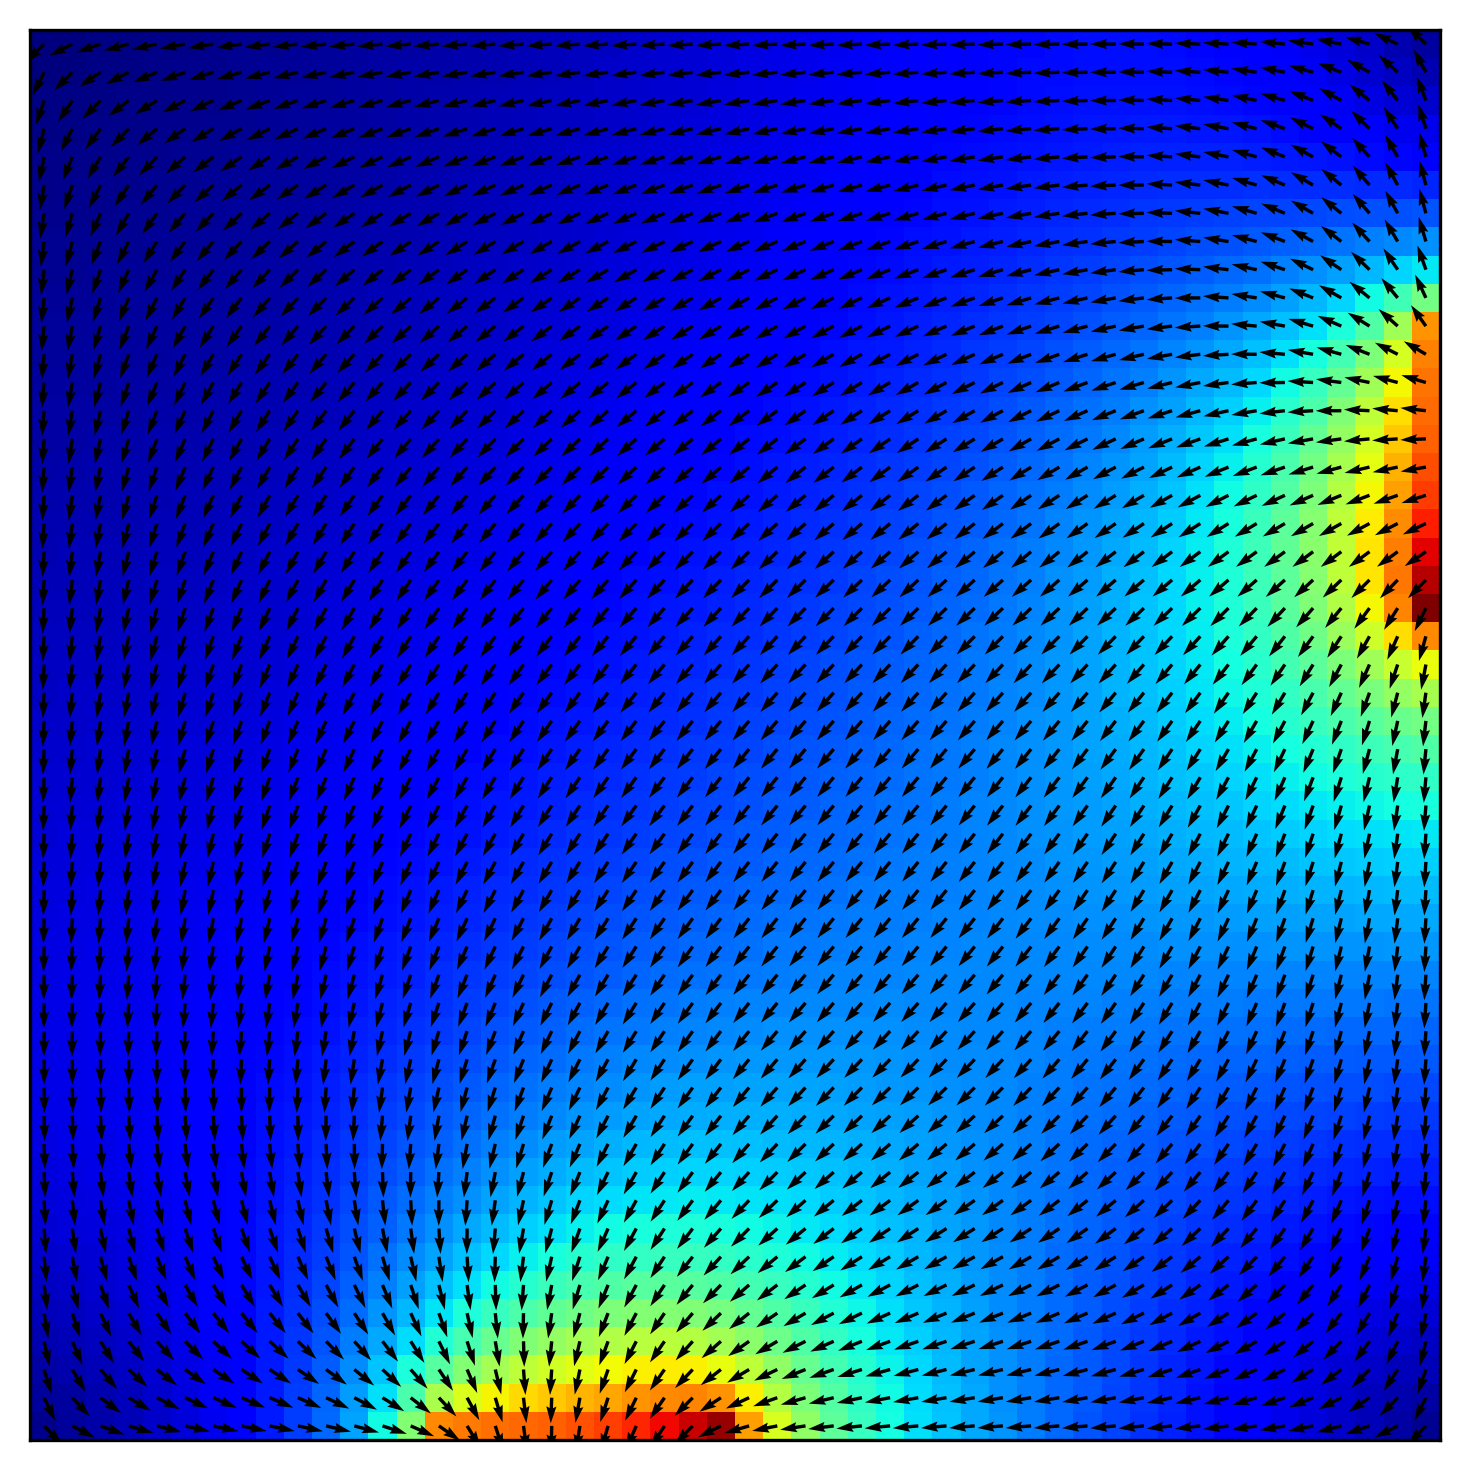

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(num=None, figsize=(5, 5), dpi=300, facecolor='w', edgecolor='k')

# Plotting vectors
plt.quiver(vel_x2, vel_y2, scale_units="xy", scale=(L*1.1)/L)

# Plotting heatmap
plt.imshow(vel2, interpolation='nearest', cmap=cm.jet)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

plt.savefig("flow.png", dpi=300, bbox_inches='tight')
